## **Rainfall Trend in India (1901-2015)**


## **Problem**


> India’s dependency on rainfall for agricultural productivity and water resource management necessitates a deep understanding of its temporal and spatial variability. This study aims to address critical questions regarding rainfall trends and their implications. The key objectives include analyzing historical rainfall data to uncover patterns and trends, detecting years or months with anomalous rainfall behavior, and exploring the relationships between seasonal and annual rainfall.

> One of the primary goals is to investigate the impact of climate change on India’s rainfall patterns. Are there discernible shifts in annual or seasonal rainfall due to changing climatic conditions? Additionally, identifying drought years or periods of extreme rainfall can help policymakers and stakeholders prepare for potential adverse events




### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.graph_objects as go
import plotly.express as px
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.ensemble import IsolationForest
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("Rainfall Trends.csv")

In [5]:
df.head()

,REGION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,INDIA,1901,34.7,37.7,18.0,39.3,50.8,113.4,242.2,272.9,124.4,52.7,38.0,8.3,1032.3,72.4,108.1,752.8,99.0
1,INDIA,1902,7.4,4.3,19.0,43.5,48.3,108.8,284.0,199.7,201.5,61.5,27.9,24.4,1030.2,11.7,110.8,794.0,113.8
2,INDIA,1903,17.0,8.3,31.3,17.1,59.5,118.3,297.0,270.4,199.1,117.9,36.9,17.7,1190.5,25.3,107.9,884.8,172.5
3,INDIA,1904,14.4,9.6,31.8,33.1,72.4,164.8,261.0,206.4,129.6,69.0,11.2,16.3,1019.8,24.0,137.4,761.8,96.6
4,INDIA,1905,25.3,20.9,42.7,33.7,55.7,93.3,252.8,200.8,178.4,51.4,9.7,10.5,975.3,46.2,132.2,725.4,71.6


### **Descriptive Statistics**

In [6]:
print("\nDataFrame Shape:", df.shape)


DataFrame Shape: (115, 19)


In [7]:
print("\nDataFrame Information:")
print(df.info())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   REGION   115 non-null    object 
 1   YEAR     115 non-null    int64  
 2   JAN      115 non-null    float64
 3   FEB      115 non-null    float64
 4   MAR      115 non-null    float64
 5   APR      115 non-null    float64
 6   MAY      115 non-null    float64
 7   JUN      115 non-null    float64
 8   JUL      115 non-null    float64
 9   AUG      115 non-null    float64
 10  SEP      115 non-null    float64
 11  OCT      115 non-null    float64
 12  NOV      115 non-null    float64
 13  DEC      115 non-null    float64
 14  ANNUAL   115 non-null    float64
 15  Jan-Feb  115 non-null    float64
 16  Mar-May  115 non-null    float64
 17  Jun-Sep  115 non-null    float64
 18  Oct-Dec  115 non-null    float64
dtypes: float64(17), int64(1), object(1)
memory usage: 17.2+ KB
None


In [8]:
print("\nUnique Values per column:\n", df.nunique())


Unique Values per column:
 REGION       1
YEAR       115
JAN         99
FEB         93
MAR        104
APR        103
MAY        104
JUN        114
JUL        112
AUG        112
SEP        111
OCT        105
NOV        106
DEC         90
ANNUAL     115
Jan-Feb    105
Mar-May    107
Jun-Sep    114
Oct-Dec    110
dtype: int64


In [9]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,1958.000000,19.759130,23.434783,28.254783,38.241739,62.193913,168.360000,291.022609,258.400870,172.473043,75.701739,29.205217,14.980000,1182.034783,43.189565,128.694783,890.260870,119.882609
std,33.341666,9.992628,11.512739,12.286408,10.353040,15.673378,35.569654,41.161390,34.975419,36.641234,28.268152,16.101056,8.788761,110.686214,14.476335,22.895134,89.179055,32.467126
min,1901.000000,2.700000,2.700000,7.200000,16.100000,32.100000,86.500000,138.900000,191.700000,96.900000,20.000000,3.600000,1.600000,920.800000,11.700000,84.500000,679.500000,52.700000
25%,1929.500000,13.000000,13.300000,19.750000,31.600000,51.600000,144.050000,267.350000,233.950000,144.850000,55.600000,17.300000,9.600000,1102.400000,33.800000,112.350000,823.550000,97.050000
50%,1958.000000,17.800000,22.500000,25.500000,37.400000,59.500000,165.600000,295.800000,259.300000,173.100000,69.200000,26.100000,14.100000,1190.500000,41.300000,125.100000,897.800000,116.200000
75%,1986.500000,24.850000,30.300000,34.400000,43.850000,71.200000,192.050000,318.650000,287.950000,198.300000,92.850000,39.650000,19.000000,1243.550000,51.400000,139.650000,959.650000,142.150000
max,2015.000000,58.500000,53.800000,63.300000,69.400000,114.500000,275.500000,383.400000,335.500000,281.000000,158.800000,74.200000,54.400000,1480.300000,86.300000,209.700000,1094.500000,207.500000


### **Data Visualization**

In [10]:
# Define seasonal columns and calculate seasonal averages
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = df[seasonal_columns].mean().round(2)  # Round to 2 decimal places

# Identify the highest and lowest rainfall seasons
highest_rainfall_season = seasonal_avg.idxmax()
highest_rainfall_value = round(seasonal_avg.max(), 2)
lowest_rainfall_season = seasonal_avg.idxmin()
lowest_rainfall_value = round(seasonal_avg.min(), 2)

# Create the interactive line chart for all months
fig_monthly = go.Figure()
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

for month in monthly_columns:
    fig_monthly.add_trace(go.Scatter(
        x=df['YEAR'],
        y=df[month],
        mode='lines',
        name=month,
        hoverinfo='x+y+name',
    ))

# Update layout for better readability
fig_monthly.update_layout(
    title='Monthly Rainfall Trends in India (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    hovermode='x unified'
)

# Show the interactive plot
fig_monthly.show()


In [11]:
# analyze trends in annual rainfall over time
annual_rainfall = df[['YEAR', 'ANNUAL']]

fig_annual = go.Figure()
fig_annual.add_trace(go.Scatter(
    x=annual_rainfall['YEAR'],
    y=annual_rainfall['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='skyblue', width=2),
    opacity=0.7
))

fig_annual.add_trace(go.Scatter(
    x=annual_rainfall['YEAR'],
    y=[annual_rainfall['ANNUAL'].mean()] * len(annual_rainfall),
    mode='lines',
    name='Mean Rainfall',
    line=dict(color='red', dash='dash')
))
fig_annual.update_layout(
    title='Trend in Annual Rainfall in India (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)
fig_annual.show()


In [12]:
# Define seasonal columns and calculate seasonal averages
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = df[seasonal_columns].mean().round(2)  # Round to 2 decimal places

# Identify the highest and lowest rainfall seasons
highest_rainfall_season = seasonal_avg.idxmax()
highest_rainfall_value = round(seasonal_avg.max(), 2)
lowest_rainfall_season = seasonal_avg.idxmin()
lowest_rainfall_value = round(seasonal_avg.min(), 2)

# Generate a dropdown interactive chart for all months
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
fig = go.Figure()

# Add traces for each month, initially setting them to be invisible
for month in monthly_columns:
    mean_value = np.mean(df[month])

    fig.add_trace(go.Scatter(
        x=df['YEAR'],
        y=df[month],
        mode='lines',
        name=month,
        hoverinfo='x+y+name',
        visible=False  # Start with all traces hidden
    ))

    # Add mean line
    fig.add_trace(go.Scatter(
        x=df['YEAR'],
        y=[mean_value] * len(df['YEAR']),
        mode='lines',
        name=f'Mean {month}',
        line=dict(dash='dash', color='red'),
        visible=False
    ))

# Set the first trace to be visible by default
for i in range(2):
    fig.data[i].visible = True

# Create dropdown menu
buttons = []
for i, month in enumerate(monthly_columns):
    visibility = [False] * len(fig.data)
    visibility[i * 2] = True  # Show month data
    visibility[i * 2 + 1] = True  # Show mean line

    buttons.append(dict(
        label=month,
        method='update',
        args=[{'visible': visibility}]
    ))

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    hovermode='x unified',
    updatemenus=[
        dict(
            buttons=buttons,
            direction='right',
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.15,
            yanchor='top'
        )
    ],
    margin=dict(b=80)  # Adjust bottom margin for space
)

# Add title annotation below the graph
fig.add_annotation(
    x=0.5, y=-0.2,
    xref='paper', yref='paper',
    text='Monthly Rainfall Trends in India (1901-2015)',
    showarrow=False,
    font=dict(size=16)
)

# Show the interactive plot
fig.show()


In [13]:
# Define seasonal columns and calculate seasonal averages
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_avg = df[seasonal_columns].mean().round(2)  # Round to 2 decimal places

# Identify the highest and lowest rainfall seasons
highest_rainfall_season = seasonal_avg.idxmax()
highest_rainfall_value = round(seasonal_avg.max(), 2)
lowest_rainfall_season = seasonal_avg.idxmin()
lowest_rainfall_value = round(seasonal_avg.min(), 2)

# Create the bar chart
fig_seasonal = px.bar(
    x=seasonal_avg.index,
    y=seasonal_avg.values,
    labels={'x': 'Season', 'y': 'Rainfall (mm)'},
    title='Seasonal Rainfall Distribution in India (1901-2015)',
    text=[f'{val:.2f}' for val in seasonal_avg.values],  # Format values to 2 decimal places
    color=seasonal_avg.values,  # Use rainfall values for color mapping
    color_continuous_scale='mint'
)

# Add annotations to highlight the highest and lowest rainfall seasons
fig_seasonal.add_annotation(
    x=highest_rainfall_season,
    y=highest_rainfall_value,
    text=f'Highest: {highest_rainfall_season} ({highest_rainfall_value:.2f} mm)',
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40
)

fig_seasonal.add_annotation(
    x=lowest_rainfall_season,
    y=lowest_rainfall_value,
    text=f'Lowest: {lowest_rainfall_season} ({lowest_rainfall_value:.2f} mm)',
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=40
)

# Customize the bar chart appearance
fig_seasonal.update_traces(
    marker_line_color='black',
    marker_line_width=1,
    textposition='outside'
)

# Update layout for better readability
fig_seasonal.update_layout(
    template='plotly_white',  # Use a clean white template
    height=500,
    xaxis_title="Season",
    yaxis_title="Rainfall (mm)",
    title_x=0.5,  # Center the title
    coloraxis_colorbar=dict(title='Rainfall (mm)'),  # Add a color bar title
    hovermode="x"  # Show unified hover information
)

# Show the plot
fig_seasonal.show()

In [14]:
# Calculate monthly averages
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_avg = df[monthly_columns].mean().round(2)  # Round to 2 decimal places

# Identify months with the highest and lowest rainfall
highest_rainfall_month = monthly_avg.idxmax()
highest_rainfall_value = round(monthly_avg.max(), 2)
lowest_rainfall_month = monthly_avg.idxmin()
lowest_rainfall_value = round(monthly_avg.min(), 2)

# Create the bar chart
fig_monthly = px.bar(
    x=monthly_avg.index,
    y=monthly_avg.values,
    labels={'x': 'Month', 'y': 'Rainfall (mm)'},
    title='Average Monthly Rainfall in India (1901-2015)',
    text=[f'{val:.2f}' for val in monthly_avg.values]  # Format values to 2 decimal places
)

# Add a horizontal line for mean rainfall
fig_monthly.add_hline(
    y=monthly_avg.mean(),
    line_dash="dash",
    line_color="red",
    annotation_text=f"Mean Rainfall: {monthly_avg.mean():.2f} mm",
    annotation_position="top right"
)

# Highlight the highest and lowest rainfall months with annotations
fig_monthly.add_annotation(
    x=highest_rainfall_month,
    y=highest_rainfall_value,
    text=f'Highest: {highest_rainfall_month} ({highest_rainfall_value:.2f} mm)',
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=-40
)

fig_monthly.add_annotation(
    x=lowest_rainfall_month,
    y=lowest_rainfall_value,
    text=f'Lowest: {lowest_rainfall_month} ({lowest_rainfall_value:.2f} mm)',
    showarrow=True,
    arrowhead=1,
    ax=0,
    ay=40
)

# Customize the bar chart appearance
fig_monthly.update_traces(
    marker_color='lavender',
    marker_line_color='black',
    marker_line_width=1,
    textposition='outside'
)

# Update layout for better readability
fig_monthly.update_layout(
    template='plotly_white',
    height=500,
    xaxis_title="Month",
    yaxis_title="Rainfall (mm)",
    title_x=0.5,
    hovermode="x"
)

# Show the plot
fig_monthly.show()

In [15]:
# Calculate 10-year rolling average
df['10-Year Rolling Avg'] = df['ANNUAL'].rolling(window=10).mean()

# Create figure
fig_climate_change = go.Figure()

# Add annual rainfall trace
fig_climate_change.add_trace(go.Scatter(
    x=df['YEAR'],
    y=df['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6,
    hovertemplate='Year: %{x}<br>Rainfall: %{y:.1f} mm<extra></extra>'
))

# Add 10-year rolling average trace
fig_climate_change.add_trace(go.Scatter(
    x=df['YEAR'],
    y=df['10-Year Rolling Avg'],
    mode='lines',
    name='10-Year Rolling Avg',
    line=dict(color='red', width=3),
    hovertemplate='Year: %{x}<br>10-Year Avg: %{y:.1f} mm<extra></extra>',
    visible=True
))

# Add shaded variability range
fig_climate_change.add_trace(go.Scatter(
    x=df['YEAR'],
    y=df['ANNUAL'],
    fill='tonexty',
    mode='none',
    name='Variability Range',
    fillcolor='rgba(0, 100, 255, 0.2)',
    hoverinfo='skip'
))

# Add trendline (polynomial fit)
z = np.polyfit(df['YEAR'], df['ANNUAL'], 3)
trendline = np.poly1d(z)(df['YEAR'])

fig_climate_change.add_trace(go.Scatter(
    x=df['YEAR'],
    y=trendline,
    mode='lines',
    name='Trendline (3rd-degree)',
    line=dict(dash='dot', color='green', width=2),
    hovertemplate='Year: %{x}<br>Trend: %{y:.1f} mm<extra></extra>',
    visible=False
))

# Add dropdown menu for interactivity
fig_climate_change.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="Show All", method="update", args=[{"visible": [True, True, True, True]}]),
                dict(label="Annual Only", method="update", args=[{"visible": [True, False, True, False]}]),
                dict(label="Rolling Avg Only", method="update", args=[{"visible": [False, True, False, False]}]),
                dict(label="Trendline", method="update", args=[{"visible": [False, False, False, True]}])
            ],
            direction="down",
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        )
    ]
)

# Update layout
fig_climate_change.update_layout(
    title={
        'text': 'Impact of Climate Change on Rainfall Patterns (1901-2015)',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend", x=0.02, y=0.98),
    height=600,
    hovermode='x unified',
    margin=dict(l=50, r=50, t=80, b=50)
)

# Add vertical lines for decades
for year in range(1900, 2020, 10):
    fig_climate_change.add_vline(
        x=year,
        line_dash="dot",
        line_color="gray",
        opacity=0.5,
        annotation_text=f"{year}s",
        annotation_position="top"
    )

# Show plot
fig_climate_change.show()


In [16]:
rainfall_data = df.copy()

In [17]:
# Define monthly columns
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

# Create figure
fig_monthly = go.Figure()

# Add traces for each month
for month in monthly_columns:
    # Calculate 10-year rolling average
    df[f'10-Year Rolling Avg {month}'] = df[month].rolling(window=10, min_periods=1).mean()

    # Monthly Rainfall Trace
    fig_monthly.add_trace(go.Scatter(
        x=df['YEAR'],
        y=df[month],
        mode='lines',
        name=f'{month} Rainfall',
        hovertemplate='Year: %{x}<br>Rainfall: %{y:.1f} mm<extra></extra>',
        visible=False,
        line=dict(color='blue', width=2),
        opacity=0.6
    ))

    # Rolling Average Trace
    fig_monthly.add_trace(go.Scatter(
        x=df['YEAR'],
        y=df[f'10-Year Rolling Avg {month}'],
        mode='lines',
        name=f'10-Year Avg {month}',
        line=dict(dash='dash', color='red', width=3),
        hovertemplate='Year: %{x}<br>10-Year Avg: %{y:.1f} mm<extra></extra>',
        visible=False
    ))

    # Trendline (Savitzky-Golay Filter for Smoothing)
    valid_values = df[month].dropna()  # Remove NaN values to avoid errors
    trendline = savgol_filter(valid_values, window_length=min(len(valid_values), 15), polyorder=3) if len(valid_values) > 15 else valid_values

    fig_monthly.add_trace(go.Scatter(
        x=df['YEAR'][:len(trendline)],  # Ensure alignment with available data
        y=trendline,
        mode='lines',
        name=f'Trendline {month}',
        line=dict(dash='dot', color='green', width=2),
        hovertemplate='Year: %{x}<br>Trend: %{y:.1f} mm<extra></extra>',
        visible=False
    ))

    # Shaded Area Between Monthly Rainfall and Rolling Average
    fig_monthly.add_trace(go.Scatter(
        x=df['YEAR'],
        y=df[month],
        fill='tonexty',
        mode='none',
        name=f'Variability Range {month}',
        fillcolor='rgba(0, 100, 255, 0.2)',
        hoverinfo='skip',
        visible=False
    ))

# Set first month (January) visible by default
for i in range(4):  # 4 traces per month (rainfall, rolling avg, trendline, shaded area)
    fig_monthly.data[i].visible = True

# Create dropdown menu
buttons = []
for i, month in enumerate(monthly_columns):
    visibility = [False] * len(fig_monthly.data)

    visibility[i * 4] = True   # Show monthly rainfall data
    visibility[i * 4 + 1] = True  # Show 10-year rolling average
    visibility[i * 4 + 2] = True  # Show trendline
    visibility[i * 4 + 3] = True  # Show shaded area

    buttons.append(dict(
        label=month,
        method='update',
        args=[{'visible': visibility},
              {'title.text': f'{month} Rainfall Trends (1901-2015)'}]
    ))

# Update layout with dropdown
fig_monthly.update_layout(
    title={
        'text': 'Monthly Rainfall Trends in India (1901-2015)',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    hovermode='x unified',
    updatemenus=[dict(
        buttons=buttons,
        direction='right',
        showactive=True,
        x=0.1,
        xanchor='left',
        y=1.2,
        yanchor='top'
    )],
    height=600,
    margin=dict(l=50, r=50, t=100, b=50)
)

# Show plot
fig_monthly.show()


In [18]:
# Define thresholds for drought and extreme rainfall
threshold_multiplier = 1.5  # Can be adjusted
mean_rainfall = rainfall_data['ANNUAL'].mean()
std_dev_rainfall = rainfall_data['ANNUAL'].std()

# Identify drought and extreme rainfall years
drought_years = rainfall_data[rainfall_data['ANNUAL'] < (mean_rainfall - threshold_multiplier * std_dev_rainfall)]
extreme_rainfall_years = rainfall_data[rainfall_data['ANNUAL'] > (mean_rainfall + threshold_multiplier * std_dev_rainfall)]

# Correlate seasonal rainfall with annual rainfall totals
seasonal_columns = ['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']
seasonal_correlations = {
    season: pearsonr(rainfall_data[season], rainfall_data['ANNUAL'])[0] for season in seasonal_columns
}

# Create summary tables
drought_years_summary = drought_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
drought_years_summary['Category'] = 'Drought'

extreme_rainfall_years_summary = extreme_rainfall_years[['YEAR', 'ANNUAL']].reset_index(drop=True)
extreme_rainfall_years_summary['Category'] = 'Extreme Rainfall'

# Combine drought and extreme rainfall years for visualization
extreme_years_summary = pd.concat([drought_years_summary, extreme_rainfall_years_summary], ignore_index=True)

# Create a DataFrame for seasonal correlations
seasonal_correlations_summary = pd.DataFrame.from_dict(seasonal_correlations, orient='index', columns=['Correlation'])
seasonal_correlations_summary.index.name = 'Season'

# Visualize drought and extreme rainfall years
fig_extreme_years = px.scatter(
    extreme_years_summary,
    x='YEAR',
    y='ANNUAL',
    color='Category',
    title='Drought and Extreme Rainfall Years',
    labels={'YEAR': 'Year', 'ANNUAL': 'Annual Rainfall (mm)'},
    color_discrete_map={'Drought': 'red', 'Extreme Rainfall': 'blue'}
)

# Add mean and threshold lines for context
fig_extreme_years.add_hline(
    y=mean_rainfall,
    line_dash="dash",
    line_color="green",
    annotation_text="Mean Rainfall",
    annotation_position="top right"
)

fig_extreme_years.add_hline(
    y=mean_rainfall - threshold_multiplier * std_dev_rainfall,
    line_dash="dot",
    line_color="orange",
    annotation_text="Drought Threshold",
    annotation_position="bottom right"
)

fig_extreme_years.add_hline(
    y=mean_rainfall + threshold_multiplier * std_dev_rainfall,
    line_dash="dot",
    line_color="purple",
    annotation_text="Extreme Rainfall Threshold",
    annotation_position="top right"
)

# Update layout for better readability
fig_extreme_years.update_layout(
    template='plotly_white',
    height=500,
    xaxis_title="Year",
    yaxis_title="Annual Rainfall (mm)",
    title_x=0.5
)

# Show plots
fig_extreme_years.show()

In [19]:
# Display summary tables
print("Drought Years Summary:")
print(drought_years_summary)

Drought Years Summary:
   YEAR  ANNUAL Category
0  1905   975.3  Drought
1  1965   938.4  Drought
2  1972   948.5  Drought
3  2002   920.8  Drought
4  2009   959.3  Drought


In [20]:
print("\nExtreme Rainfall Years Summary:")
print(extreme_rainfall_years_summary)


Extreme Rainfall Years Summary:
   YEAR  ANNUAL          Category
0  1917  1480.3  Extreme Rainfall
1  1933  1393.5  Extreme Rainfall
2  1956  1386.2  Extreme Rainfall
3  1959  1382.1  Extreme Rainfall
4  1961  1403.0  Extreme Rainfall
5  1988  1351.0  Extreme Rainfall
6  1990  1400.6  Extreme Rainfall


In [21]:
print("\nSeasonal Correlations Summary:")
print(seasonal_correlations_summary)


Seasonal Correlations Summary:
         Correlation
Season              
Jan-Feb     0.228913
Mar-May     0.313057
Jun-Sep     0.930027
Oct-Dec     0.531648


In [22]:
# Visualize seasonal correlations
fig_seasonal_corr = px.bar(
    round(seasonal_correlations_summary, 4),
    x=seasonal_correlations_summary.index,
    y='Correlation',
    title='Correlation of Seasonal Rainfall with Annual Rainfall',
    labels={'index': 'Season', 'Correlation': 'Correlation Coefficient'},
    text=np.round(seasonal_correlations_summary['Correlation'], 2),
    color='Correlation',
    color_continuous_scale='bluyl'
)


fig_seasonal_corr.update_layout(
    template='plotly_white',
    height=400,
    xaxis_title="Season",
    yaxis_title="Correlation Coefficient",
    title_x=0.5,
    coloraxis_showscale=False
)

# Show plots
fig_seasonal_corr.show()


> **Isolation Forest is an unsupervised machine learning algorithm for anomaly detection**



In [23]:
# Set contamination level for Isolation Forest
isolation_forest = IsolationForest(contamination=0.07, random_state=42)

# Detect anomalous rainfall years based on annual data
rainfall_data['Annual_Anomaly'] = isolation_forest.fit_predict(rainfall_data[['ANNUAL']])

# Identify anomalous years in annual rainfall
annual_anomalies = rainfall_data[rainfall_data['Annual_Anomaly'] == -1]

# Identify extreme rainfall years (≥ 1350mm)
extreme_rainfall_years = rainfall_data[rainfall_data['ANNUAL'] >= 1350]

# Create the figure
fig_annual_anomalies = go.Figure()

# Add Annual Rainfall Trend
fig_annual_anomalies.add_trace(go.Scatter(
    x=rainfall_data['YEAR'],
    y=rainfall_data['ANNUAL'],
    mode='lines',
    name='Annual Rainfall',
    line=dict(color='blue', width=2),
    opacity=0.6
))

# Highlight Anomalous Years
fig_annual_anomalies.add_trace(go.Scatter(
    x=annual_anomalies['YEAR'],
    y=annual_anomalies['ANNUAL'],
    mode='markers',
    name='Anomalous Years',
    marker=dict(color='red', size=8, symbol='circle')
))

# Highlight Extreme Rainfall Years (≥ 1350mm)
fig_annual_anomalies.add_trace(go.Scatter(
    x=extreme_rainfall_years['YEAR'],
    y=extreme_rainfall_years['ANNUAL'],
    mode='markers',
    name='Extreme Rainfall (≥ 1350mm)',
    marker=dict(color='purple', size=10, symbol='triangle-up')
))

# Add Mean Rainfall Line
fig_annual_anomalies.add_hline(
    y=rainfall_data['ANNUAL'].mean(),
    line_dash='dash',
    line_color='green',
    annotation_text='Mean Rainfall',
    annotation_position='bottom right'
)

# Update Layout
fig_annual_anomalies.update_layout(
    title='Annual Rainfall Anomalies & Extreme Years in India (1901-2015)',
    xaxis_title='Year',
    yaxis_title='Rainfall (mm)',
    template='plotly_white',
    legend=dict(title="Legend"),
    height=500
)

# Show the plot
fig_annual_anomalies.show()


In [24]:
# Select only monthly rainfall columns
monthly_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
monthly_data = rainfall_data[monthly_columns]

# Fit Isolation Forest on monthly data
isolation_forest_monthly = IsolationForest(contamination=0.05, random_state=42)
rainfall_data['Monthly_Anomaly'] = isolation_forest_monthly.fit_predict(monthly_data)

# Identify monthly anomalies (months where anomaly is detected)
monthly_anomalies = rainfall_data[rainfall_data['Monthly_Anomaly'] == -1]

fig_monthly_anomalies = px.scatter(
    monthly_anomalies.melt(id_vars=['YEAR'], value_vars=monthly_columns, var_name='Month', value_name='Rainfall'),
    x='YEAR',
    y='Rainfall',
    color='Month',
    title='Monthly Rainfall Anomalies Over the Years',
    labels={'YEAR': 'Year', 'Rainfall': 'Rainfall (mm)'},
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig_monthly_anomalies.update_layout(
    template='plotly_white',
    height=500,
    xaxis_title="Year",
    yaxis_title="Rainfall (mm)",
    title_x=0.5
)

# Show the plot
fig_monthly_anomalies.show()

In [25]:
# prepare data for clustering
rainfall_features = rainfall_data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rainfall_features)

# perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rainfall_data['Rainfall_Cluster'] = kmeans.fit_predict(scaled_features)

# map cluster labels to categories (e.g., Dry, Normal, Wet)
cluster_labels = {0: 'Dry', 1: 'Normal', 2: 'Wet'}
rainfall_data['Rainfall_Category'] = rainfall_data['Rainfall_Cluster'].map(cluster_labels)

fig = px.scatter(
    rainfall_data,
    x='YEAR',
    y='ANNUAL',
    color='Rainfall_Category',
    title='Clustering of Years Based on Rainfall Patterns',
    labels={'YEAR': 'Year', 'ANNUAL': 'Annual Rainfall (mm)', 'Rainfall_Category': 'Rainfall Category'},
    color_discrete_sequence=px.colors.qualitative.Set2,
    hover_data={'Rainfall_Cluster': True, 'Rainfall_Category': True}
)

fig.update_layout(
    template='plotly_white',
    legend_title='Rainfall Category',
    height=500
)

fig.show()

In [26]:
# Prepare data for clustering
rainfall_features = rainfall_data[['Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec', 'ANNUAL']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rainfall_features)

# Fit K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
rainfall_data['Rainfall_Cluster'] = kmeans.fit_predict(scaled_features)

# Dynamically Map Cluster Labels Based on Mean Annual Rainfall
cluster_means = rainfall_data.groupby('Rainfall_Cluster')['ANNUAL'].mean().sort_values()
cluster_labels = {cluster_means.index[0]: 'Dry', cluster_means.index[1]: 'Normal', cluster_means.index[2]: 'Wet'}
rainfall_data['Rainfall_Category'] = rainfall_data['Rainfall_Cluster'].map(cluster_labels)

fig = px.scatter(
    rainfall_data,
    x='YEAR',
    y='ANNUAL',
    color='Rainfall_Category',
    title='Clustering of Years Based on Rainfall Patterns',
    labels={'YEAR': 'Year', 'ANNUAL': 'Annual Rainfall (mm)', 'Rainfall_Category': 'Rainfall Category'},
    color_discrete_map={'Dry': 'red', 'Normal': 'blue', 'Wet': 'green'},  # Clearer Color Mapping
    hover_data={'Rainfall_Cluster': True, 'Rainfall_Category': True}
)

fig.update_layout(
    template='plotly_white',
    legend_title='Rainfall Category',
    height=500,
    xaxis_title="Year",
    yaxis_title="Annual Rainfall (mm)",
    title_x=0.5
)

fig.show()

### **Forecasting Next 30 Years**

### **PROPHET MODEL**

In [27]:
rainfall_df = rainfall_data[['YEAR', 'ANNUAL']].copy()
rainfall_df.columns = ['ds', 'y']  # Prophet requires columns to be named 'ds' (date) and 'y' (value)
rainfall_df['ds'] = pd.to_datetime(rainfall_df['ds'], format='%Y')  # Convert year to datetime

model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.05)
model.fit(rainfall_df)

future = model.make_future_dataframe(periods=30, freq='Y')

forecast = model.predict(future)

forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_df.columns = ['YEAR', 'Forecasted_Rainfall', 'Lower_Bound', 'Upper_Bound']
forecast_df['YEAR'] = forecast_df['YEAR'].dt.year  # Convert back to year format

# Plot Actual vs. Forecasted Rainfall
fig = px.line(forecast_df, x='YEAR', y='Forecasted_Rainfall',
              title='Rainfall Forecast for Next 30 Years', labels={'YEAR': 'Year', 'Forecasted_Rainfall': 'Annual Rainfall (mm)'},
              line_shape='spline')

fig.add_scatter(x=rainfall_data['YEAR'], y=rainfall_data['ANNUAL'],
                mode='markers+lines', name='Actual Data', marker=dict(color='blue'))

# Add Confidence Interval (Shaded Region)
fig.add_scatter(x=forecast_df['YEAR'], y=forecast_df['Upper_Bound'],
                mode='lines', name='Upper Bound', line=dict(dash='dot', color='gray'))
fig.add_scatter(x=forecast_df['YEAR'], y=forecast_df['Lower_Bound'],
                mode='lines', name='Lower Bound', line=dict(dash='dot', color='gray'), fill='tonexty')

fig.update_layout(template='plotly_white', height=500, xaxis_title='Year', yaxis_title='Rainfall (mm)', title_x=0.5)

fig.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgecmumh/hfftd9lo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgecmumh/52n9nk6z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2384', 'data', 'file=/tmp/tmpbgecmumh/hfftd9lo.json', 'init=/tmp/tmpbgecmumh/52n9nk6z.json', 'output', 'file=/tmp/tmpbgecmumh/prophet_model3a78x_vh/prophet_model-20250210114551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:45:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:45:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### **ARIMA MODEL**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



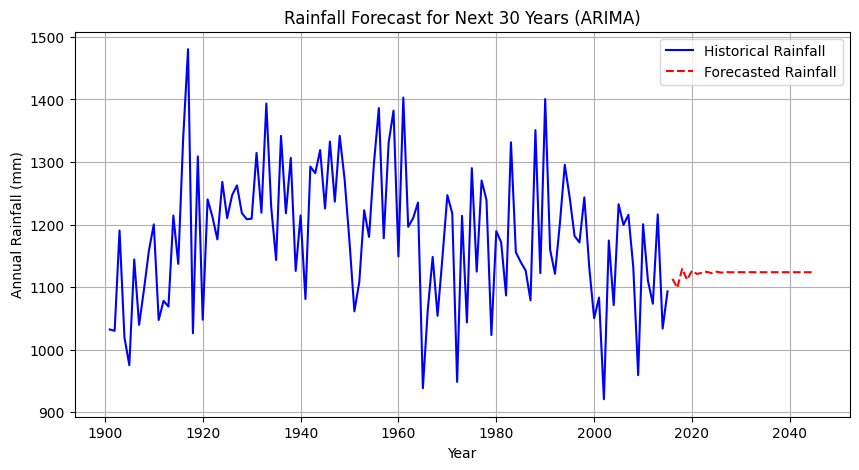

In [28]:
# Ensure the data is sorted by year
rainfall_data = rainfall_data.sort_values(by="YEAR").reset_index(drop=True)

# Convert to time series format
rainfall_ts = rainfall_data.set_index("YEAR")["ANNUAL"]

# Fit ARIMA model (optimal order can be determined using AIC/BIC tuning)
model = ARIMA(rainfall_ts, order=(3, 1, 2))  # (p,d,q) values can be tuned
model_fit = model.fit()

# Forecast next 30 years
future_years = np.arange(rainfall_data["YEAR"].max() + 1, rainfall_data["YEAR"].max() + 31)
forecast = model_fit.forecast(steps=30)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(rainfall_data["YEAR"], rainfall_data["ANNUAL"], label="Historical Rainfall", color="blue")
plt.plot(future_years, forecast, label="Forecasted Rainfall", color="red", linestyle="dashed")
plt.xlabel("Year")
plt.ylabel("Annual Rainfall (mm)")
plt.title("Rainfall Forecast for Next 30 Years (ARIMA)")
plt.legend()
plt.grid()
plt.show()
